# write your own sanity check and your own bouts flipping or whatever!
            max_interbout_interval=5,   # seconds
            max_ratio_false_interbout_interval=0.05,  # 5% of all bouts within a trial can be bigger than max_value
            max_speed=1,                # cm/s?  # TODO: find proper unit
            max_ratio_false_speed=0.05,  # 5% of all bouts within a trial can be bigger than max_value
            max_contour_area=600,       # pixels^2
            max_ratio_false_contour_area=0.05,  # 5% of all bouts within a trial can be bigger than max_value
            max_orientation_change=150, # deg
            max_ratio_false_orientation_change=0.05,  # 5% of all bouts within a trial can be bigger than max_value
            max_radius_fraction=11.5/12,  # for dish with radius from 0 to 1.
            max_ratio_false_radius_fraction=0.05,

In [3]:
import datetime
import math

import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
pd.set_option('display.max_columns', None)


In [ ]:
# all the sanity checks or watever the new stuff shall come here!

In [35]:
all_data_sine_gratings = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_combined.hdf5")
all_data_sine_gratings.reset_index(inplace = True)

In [41]:
def fish_ids(df):
    df['fish_ID'] = df.loc[:, 'folder_name']
    old_fish_name = df['folder_name'].unique().tolist()
    new_fish_name = list(range(0,len(old_fish_name)))
    df['fish_ID'].replace(old_fish_name, new_fish_name,inplace = True)
    return df
new_fish_ids = fish_ids(all_data_sine_gratings)

In [32]:
print(new_fish_ids['folder_name'].unique().tolist())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]


In [43]:
new_fish_ids

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,start_contour_area,start_x_position,start_y_position,start_accumulated_path,start_accumulated_orientation,start_accumulated_orientation_windowed_variance,end_time,end_contour_area,end_x_position,end_y_position,end_accumulated_path,end_accumulated_orientation,end_accumulated_orientation_windowed_variance,duration,x_position_change,y_position_change,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute
0,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,0.900937,436.799341,0.260595,-0.800479,0.018379,152.469522,22.334472,0.978714,426.205451,0.257281,-0.787961,0.035878,127.761665,0.647149,0.077777,-0.003314,0.012518,0.017499,-24.707858,0.224991,5.455511,1.0,2022-12-15 16:05:16.668769024+01:00,2022-12-15 16:05:16.746546176+01:00
1,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,2.045372,430.945952,0.255593,-0.782603,0.06529,123.279817,3.252626,2.134261,439.597598,0.250548,-0.771046,0.079705,117.833909,1.315595,0.088888,-0.005045,0.011557,0.014415,-5.445908,0.162172,1.066658,1.0,2022-12-15 16:05:17.813204224+01:00,2022-12-15 16:05:17.902092544+01:00
2,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,5.256458,453.67437,0.248279,-0.765362,0.175694,117.263132,3.517604,5.378679,434.097922,0.258792,-0.759235,0.194297,80.37626,0.411486,0.122221,0.010513,0.006127,0.018604,-36.886872,0.152214,3.122197,1.0,2022-12-15 16:05:21.024289280+01:00,2022-12-15 16:05:21.146510592+01:00
3,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,6.534225,423.351763,0.260127,-0.760597,0.225979,77.8871,2.193827,6.578669,442.166392,0.262827,-0.755041,0.233961,73.192102,1.007521,0.044444,0.0027,0.005555,0.007983,-4.694998,0.179616,1.155546,1.0,2022-12-15 16:05:22.302056704+01:00,2022-12-15 16:05:22.346500864+01:00
4,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,8.889761,438.423249,0.267919,-0.739616,0.317043,70.720463,2.008451,8.911983,438.805223,0.268213,-0.738433,0.320258,70.181236,1.242377,0.022222,0.000294,0.001182,0.003215,-0.539227,0.144678,2.311092,1.0,2022-12-15 16:05:24.657593344+01:00,2022-12-15 16:05:24.679815168+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.091526,457.449655,0.063992,-0.896925,355.536432,-3831.621668,2.141099,45.813743,433.834463,0.063553,-0.896494,355.582669,-3829.76728,1.488593,0.722216,-0.000439,0.00043,0.046237,1.854388,0.064022,0.066666,0.0,2022-12-20 18:39:28.269006848+01:00,2022-12-20 18:39:28.991223296+01:00
842531,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.880409,435.045481,0.0638,-0.896861,355.58444,-3828.930318,2.177554,46.524848,440.083146,0.064021,-0.896885,355.626429,-3829.502654,1.435924,0.644439,0.00022,-0.000024,0.04199,-0.572336,0.065157,0.066666,0.0,2022-12-20 18:39:29.057889536+01:00,2022-12-20 18:39:29.702328576+01:00
842532,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,46.602625,430.401415,0.063645,-0.89656,355.629022,-3828.097561,3.759331,48.191501,452.520952,0.063863,-0.896826,355.726395,-3829.442337,0.924203,1.588876,0.000218,-0.000266,0.097373,-1.344777,0.061284,0.077777,1.0,2022-12-20 18:39:29.780105728+01:00,2022-12-20 18:39:31.368981760+01:00
842533,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,48.258167,437.601948,0.063712,-0.896639,355.727794,-3829.370354,2.094734,49.48038,445.625064,0.063945,-0.896866,355.813754,-3829.523498,0.700758,1.222212,0.000233,-0.000227,0.08596,-0.153143,0.070332,0.066666,1.0,2022-12-20 18:39:31.435648+01:00,2022-12-20 18:39:32.657860352+01:00


In [63]:
# lets just create a function that fixes fish_id
def fish_ids(all_data):
    fish_name = all_data['fish_name'].unique().tolist()
    id = 0
    for fish in tqdm(fish_name):
        for i in range(len(all_data)):
            if all_data['fish_name'][i] == fish:
                all_data['fish_ID'][i] = id
        id+=1
    return all_data


100%|██████████| 98/98 [04:04<00:00,  2.50s/it]


,setup_index,arena_index,experiment_repeat,fish_ID,fish_name,fish_genotype,fish_age,stimulus_name,trial,start_time,...,y_position_change,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute,start_accumulated_orientation_windowed_variance,end_accumulated_orientation_windowed_variance
0,0,0,0,0,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,3,32.899434,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-09 17:23:58.383394560+01:00,2022-11-09 17:23:58.450060544+01:00,NaN,NaN
1,0,0,0,0,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,3,34.877196,...,-0.022065,0.031111,58.890305,0.215385,1.911096,0.0,2022-11-09 17:24:00.361156352+01:00,2022-11-09 17:24:00.505599488+01:00,NaN,NaN
2,0,0,0,0,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,19.086126,...,0.002245,0.036542,70.626675,0.205551,44.066309,1.0,2022-11-09 17:24:44.571908864+01:00,2022-11-09 17:24:44.749685248+01:00,NaN,NaN
3,0,0,0,0,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,20.141673,...,-0.000932,0.007229,6.385437,0.162663,0.877771,1.0,2022-11-09 17:24:45.627456+01:00,2022-11-09 17:24:45.671900160+01:00,NaN,NaN
4,0,0,0,0,2022-11-09_17-20-25_setup0_arena0,WT,5 dpf,60_plaid_0,4,20.908333,...,0.000406,0.006540,5.680229,0.147150,0.722216,1.0,2022-11-09 17:24:46.394116352+01:00,2022-11-09 17:24:46.438560512+01:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713116,1,7,0,97,2022-12-06_17-56-31_setup1_arena7,WT,5 dpf,60_plaid_0,119,57.007911,...,-0.242651,0.254000,-1.250546,1.088582,0.177776,0.0,2022-12-06 19:56:28.473107968+01:00,2022-12-06 19:56:28.706439424+01:00,2.199129,0.243642
713117,1,7,0,97,2022-12-06_17-56-31_setup1_arena7,WT,5 dpf,60_plaid_0,119,57.496796,...,-0.185668,0.193686,0.533230,0.871593,0.255553,0.0,2022-12-06 19:56:28.961992960+01:00,2022-12-06 19:56:29.184213504+01:00,9.537748,1.262048
713118,1,7,0,97,2022-12-06_17-56-31_setup1_arena7,WT,5 dpf,60_plaid_0,119,57.930125,...,-0.165117,0.198814,24.974500,0.777973,0.211109,1.0,2022-12-06 19:56:29.395322880+01:00,2022-12-06 19:56:29.650876160+01:00,4.840243,0.332365
713119,1,7,0,97,2022-12-06_17-56-31_setup1_arena7,WT,5 dpf,60_plaid_0,119,58.407899,...,-0.094230,0.156082,8.742300,0.413160,0.222220,1.0,2022-12-06 19:56:29.873096704+01:00,2022-12-06 19:56:30.250871296+01:00,3.716539,1.429613


In [93]:
stimuli_names = all_data_sine_gratings['stimulus_name'].unique().tolist()

In [13]:
# the flip should be done in the very beginning alongside with fish ids and stuff..
# [all_data_sine_gratings['stimulus_name'].unique().tolist()
flip_list = ['motion_rightdown45','motion_rightup45','motion_rightward']
def flip_flops(df):
    # put them in a stupid list first?
    nr = 0
    flip_list = []
    for row in tqdm(range(0,len(df))):
        if ((df['stimulus_name'][row] == 'motion_rightdown45') or (df['stimulus_name'][row] =='motion_rightup45') or(df['stimulus_name'][row] == 'motion_rightward'))  :
            flip_list.append(-df['estimated_orientation_change'][row])
            nr+=1
        else:
            flip_list.append(df['estimated_orientation_change'][row])
    print(len(df), nr)
    df['estimated_orientation_change_flipped'] = flip_list
    return df
all_data_flipped = flip_flops(all_data_sine_gratings)

100%|██████████| 842535/842535 [00:09<00:00, 86007.01it/s]


842535 277345


In [15]:
def label_bouts(all_fish_df, name_of_data,bout_angle_threshold = 2):
    all_fish_df['time'] = all_fish_df['end_time']
    all_fish_df['left_bouts'] = np.nan
    all_fish_df['right_bouts'] = np.nan
    all_fish_df['straight_bouts'] = np.nan
    all_fish_df['bout_orientation'] = np.nan
    all_fish_df['bout_orientation_absolute'] = np.nan

    for index in tqdm(range(len(all_fish_df))):
        ori_change = all_fish_df['estimated_orientation_change_flipped'].iloc[index]
        if ori_change > bout_angle_threshold:
            all_fish_df['left_bouts'].iloc[index] = 1
            all_fish_df['right_bouts'].iloc[index] = 0
            all_fish_df['straight_bouts'].iloc[index] = 0
            all_fish_df['bout_orientation'].iloc[index] = 1

        elif ori_change < -bout_angle_threshold:
            all_fish_df['left_bouts'].iloc[index] = 0
            all_fish_df['right_bouts'].iloc[index] = 1
            all_fish_df['straight_bouts'].iloc[index] = 0
            all_fish_df['bout_orientation'].iloc[index] = -1

        elif abs(ori_change) < bout_angle_threshold:
            all_fish_df['left_bouts'].iloc[index] = 0
            all_fish_df['right_bouts'].iloc[index] = 0
            all_fish_df['straight_bouts'].iloc[index] = 1
            all_fish_df['bout_orientation'].iloc[index] = 0

        else:
            all_fish_df['left_bouts'].iloc[index] = np.nan
            all_fish_df['right_bouts'].iloc[index] = np.nan
            all_fish_df['straight_bouts'].iloc[index] = np.nan
            all_fish_df['bout_orientation'].iloc[index] = np.nan
        if ori_change>0:
            all_fish_df['bout_orientation_absolute'].iloc[index] = 1
            all_fish_df['left_bouts_absolute'].iloc[index] = 1
            all_fish_df['right_bouts_absolute'].iloc[index] = 0
        elif ori_change<0:
            all_fish_df['bout_orientation_absolute'].iloc[index] = -1
            all_fish_df['left_bouts_absolute'].iloc[index] = 0
            all_fish_df['right_bouts_absolute'].iloc[index] = 1
        else:
            all_fish_df['bout_orientation_absolute'].iloc[index] = np.nan
            all_fish_df['left_bouts_absolute'].iloc[index] = np.nan
            all_fish_df['right_bouts_absolute'].iloc[index] = np.nan
    print('labelling done')
    return all_fish_df

In [ ]:
 # absolute right and absolute left! - bigger or smaller than zero! add them to all data in the preprocessing stage. - based on estimated orientation change!

In [15]:
all_data_sine_gratings

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,start_contour_area,start_x_position,start_y_position,start_accumulated_path,start_accumulated_orientation,start_accumulated_orientation_windowed_variance,end_time,end_contour_area,end_x_position,end_y_position,end_accumulated_path,end_accumulated_orientation,end_accumulated_orientation_windowed_variance,duration,x_position_change,y_position_change,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute,estimated_orientation_change_flipped
0,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,0.900937,436.799341,0.260595,-0.800479,0.018379,152.469522,22.334472,0.978714,426.205451,0.257281,-0.787961,0.035878,127.761665,0.647149,0.077777,-0.003314,0.012518,0.017499,-24.707858,0.224991,5.455511,1.0,2022-12-15 16:05:16.668769024+01:00,2022-12-15 16:05:16.746546176+01:00,-24.707858
1,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,2.045372,430.945952,0.255593,-0.782603,0.06529,123.279817,3.252626,2.134261,439.597598,0.250548,-0.771046,0.079705,117.833909,1.315595,0.088888,-0.005045,0.011557,0.014415,-5.445908,0.162172,1.066658,1.0,2022-12-15 16:05:17.813204224+01:00,2022-12-15 16:05:17.902092544+01:00,-5.445908
2,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,5.256458,453.67437,0.248279,-0.765362,0.175694,117.263132,3.517604,5.378679,434.097922,0.258792,-0.759235,0.194297,80.37626,0.411486,0.122221,0.010513,0.006127,0.018604,-36.886872,0.152214,3.122197,1.0,2022-12-15 16:05:21.024289280+01:00,2022-12-15 16:05:21.146510592+01:00,-36.886872
3,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,6.534225,423.351763,0.260127,-0.760597,0.225979,77.8871,2.193827,6.578669,442.166392,0.262827,-0.755041,0.233961,73.192102,1.007521,0.044444,0.0027,0.005555,0.007983,-4.694998,0.179616,1.155546,1.0,2022-12-15 16:05:22.302056704+01:00,2022-12-15 16:05:22.346500864+01:00,-4.694998
4,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,8.889761,438.423249,0.267919,-0.739616,0.317043,70.720463,2.008451,8.911983,438.805223,0.268213,-0.738433,0.320258,70.181236,1.242377,0.022222,0.000294,0.001182,0.003215,-0.539227,0.144678,2.311092,1.0,2022-12-15 16:05:24.657593344+01:00,2022-12-15 16:05:24.679815168+01:00,-0.539227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.091526,457.449655,0.063992,-0.896925,355.536432,-3831.621668,2.141099,45.813743,433.834463,0.063553,-0.896494,355.582669,-3829.76728,1.488593,0.722216,-0.000439,0.00043,0.046237,-1.854388,0.064022,0.066666,0.0,2022-12-20 18:39:28.269006848+01:00,2022-12-20 18:39:28.991223296+01:00,1.854388
842531,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.880409,435.045481,0.0638,-0.896861,355.58444,-3828.930318,2.177554,46.524848,440.083146,0.064021,-0.896885,355.626429,-3829.502654,1.435924,0.644439,0.00022,-0.000024,0.04199,0.572336,0.065157,0.066666,0.0,2022-12-20 18:39:29.057889536+01:00,2022-12-20 18:39:29.702328576+01:00,-0.572336
842532,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,46.602625,430.401415,0.063645,-0.89656,355.629022,-3828.097561,3.759331,48.191501,452.520952,0.063863,-0.896826,355.726395,-3829.442337,0.924203,1.588876,0.000218,-0.000266,0.097373,1.344777,0.061284,0.077777,1.0,2022-12-20 18:39:29.780105728+01:00,2022-12-20 18:39:31.368981760+01:00,-1.344777
842533,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,48.258167,437.601948,0.063712,-0.896639,355.727794,-3829.370354,2.094734,49.48038,445.625064,0.063945,-0.896866,355.813754,-3829.523498,0.700758,1.222212,0.000233,-0.000227,0.08596,0.153143,0.070332,0.066666,1.0,2022-12-20 18:39:31.435648+01:00,2022-12-20 18:39:32.657860352+01:00,

In [ ]:
# radius presence of the fish in the arena function:

In [ ]:
# we get start_x_position and start_y_position


In [26]:
def bin_data(label_df,name_of_data, bin_size = 1):
    time_index = label_df['end_time']
    label_df['binned_time'] = time_index - time_index % bin_size + bin_size / 2
    label_df = label_df.reset_index()
    bin_df = label_df.groupby(['fish_ID', 'stimulus_name', 'binned_time']).sum()
    bin_df['total_bouts'] = bin_df.left_bouts + bin_df.right_bouts + bin_df.straight_bouts
    #Analysed part:
    bin_df['preference_index'] = (bin_df.left_bouts - (bin_df.right_bouts + bin_df.straight_bouts))/bin_df.total_bouts
    bin_df['percentage_left'] = (bin_df.left_bouts / bin_df.total_bouts)*100
    bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\dataframes\binned_df"+str(name_of_data)+".csv")
    print('binning done')

#bin_df = bin_data(label_df=all_data_gray_8_directions,name_of_data = 'gray_8_directions',bin_size = 1)
#bin_df.to_csv(r"C:\Users\ag-bahl\Desktop\Again_09_11\bin_df_0911.csv")

binning done


In [44]:
data_prep = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")


In [45]:
data_prep

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,start_contour_area,start_x_position,start_y_position,start_accumulated_path,start_accumulated_orientation,start_accumulated_orientation_windowed_variance,end_time,end_contour_area,end_x_position,end_y_position,end_accumulated_path,end_accumulated_orientation,end_accumulated_orientation_windowed_variance,duration,x_position_change,y_position_change,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute,estimated_orientation_change_flipped,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute
0,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,0.900937,436.799341,0.260595,-0.800479,0.018379,152.469522,22.334472,0.978714,426.205451,0.257281,-0.787961,0.035878,127.761665,0.647149,0.077777,-0.003314,0.012518,0.017499,-24.707858,0.224991,5.455511,1.0,2022-12-15 16:05:16.668769024+01:00,2022-12-15 16:05:16.746546176+01:00,-24.707858,0.978714,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0
1,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,2.045372,430.945952,0.255593,-0.782603,0.06529,123.279817,3.252626,2.134261,439.597598,0.250548,-0.771046,0.079705,117.833909,1.315595,0.088888,-0.005045,0.011557,0.014415,-5.445908,0.162172,1.066658,1.0,2022-12-15 16:05:17.813204224+01:00,2022-12-15 16:05:17.902092544+01:00,-5.445908,2.134261,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0
2,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,5.256458,453.67437,0.248279,-0.765362,0.175694,117.263132,3.517604,5.378679,434.097922,0.258792,-0.759235,0.194297,80.37626,0.411486,0.122221,0.010513,0.006127,0.018604,-36.886872,0.152214,3.122197,1.0,2022-12-15 16:05:21.024289280+01:00,2022-12-15 16:05:21.146510592+01:00,-36.886872,5.378679,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0
3,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,6.534225,423.351763,0.260127,-0.760597,0.225979,77.8871,2.193827,6.578669,442.166392,0.262827,-0.755041,0.233961,73.192102,1.007521,0.044444,0.0027,0.005555,0.007983,-4.694998,0.179616,1.155546,1.0,2022-12-15 16:05:22.302056704+01:00,2022-12-15 16:05:22.346500864+01:00,-4.694998,6.578669,0.0,1.0,0.0,-1.0,-1.0,0.0,1.0
4,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,8.889761,438.423249,0.267919,-0.739616,0.317043,70.720463,2.008451,8.911983,438.805223,0.268213,-0.738433,0.320258,70.181236,1.242377,0.022222,0.000294,0.001182,0.003215,-0.539227,0.144678,2.311092,1.0,2022-12-15 16:05:24.657593344+01:00,2022-12-15 16:05:24.679815168+01:00,-0.539227,8.911983,0.0,0.0,1.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.091526,457.449655,0.063992,-0.896925,355.536432,-3831.621668,2.141099,45.813743,433.834463,0.063553,-0.896494,355.582669,-3829.76728,1.488593,0.722216,-0.000439,0.00043,0.046237,1.854388,0.064022,0.066666,0.0,2022-12-20 18:39:28.269006848+01:00,2022-12-20 18:39:28.991223296+01:00,-1.854388,45.813743,0.0,0.0,1.0,0.0,-1.0,0.0,1.0
842531,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.880409,435.045481,0.0638,-0.896861,355.58444,-3828.930318,2.177554,46.524848,440.083146,0.064021,-0.896885,355.626429,-3829.502654,1.435924,0.644439,0.00022,-0.000024,0.04199,-0.572336,0.065157,0.066666,0.0,2022-12-20 18:39:29.057889536+01:00,2022-12-20 18:39:29.702328576+01:00,0.572336,46.524848,0.0,0.0,1.0,0.0,1.0,1.0,0.0
842532,1,7,0,106,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,46.602625,430.401415,0.063645,-0.89656,355.629022,-3828.097561,3.759331,48.191501,452.520952,0.063863,-0.896826,355.726395,-3829.442337,0.924203,1.588876,0.000218,-0.000266,0.097373,-1.344777,0.061284,0.077777,1.0,2022-12-20 18:39:

In [46]:
all_data_sine_gratings = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_combined.hdf5")
all_data_sine_gratings.reset_index(inplace = True)

In [47]:
all_data_sine_gratings

,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,start_time,start_contour_area,start_x_position,start_y_position,start_accumulated_path,start_accumulated_orientation,start_accumulated_orientation_windowed_variance,end_time,end_contour_area,end_x_position,end_y_position,end_accumulated_path,end_accumulated_orientation,end_accumulated_orientation_windowed_variance,duration,x_position_change,y_position_change,distance_change,estimated_orientation_change,average_speed,interbout_interval,same_direction_as_previous_bout,start_time_absolute,end_time_absolute
0,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,0.900937,436.799341,0.260595,-0.800479,0.018379,152.469522,22.334472,0.978714,426.205451,0.257281,-0.787961,0.035878,127.761665,0.647149,0.077777,-0.003314,0.012518,0.017499,-24.707858,0.224991,5.455511,1.0,2022-12-15 16:05:16.668769024+01:00,2022-12-15 16:05:16.746546176+01:00
1,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,2.045372,430.945952,0.255593,-0.782603,0.06529,123.279817,3.252626,2.134261,439.597598,0.250548,-0.771046,0.079705,117.833909,1.315595,0.088888,-0.005045,0.011557,0.014415,-5.445908,0.162172,1.066658,1.0,2022-12-15 16:05:17.813204224+01:00,2022-12-15 16:05:17.902092544+01:00
2,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,5.256458,453.67437,0.248279,-0.765362,0.175694,117.263132,3.517604,5.378679,434.097922,0.258792,-0.759235,0.194297,80.37626,0.411486,0.122221,0.010513,0.006127,0.018604,-36.886872,0.152214,3.122197,1.0,2022-12-15 16:05:21.024289280+01:00,2022-12-15 16:05:21.146510592+01:00
3,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,6.534225,423.351763,0.260127,-0.760597,0.225979,77.8871,2.193827,6.578669,442.166392,0.262827,-0.755041,0.233961,73.192102,1.007521,0.044444,0.0027,0.005555,0.007983,-4.694998,0.179616,1.155546,1.0,2022-12-15 16:05:22.302056704+01:00,2022-12-15 16:05:22.346500864+01:00
4,2,0,0,208,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,gray,0,8.889761,438.423249,0.267919,-0.739616,0.317043,70.720463,2.008451,8.911983,438.805223,0.268213,-0.738433,0.320258,70.181236,1.242377,0.022222,0.000294,0.001182,0.003215,-0.539227,0.144678,2.311092,1.0,2022-12-15 16:05:24.657593344+01:00,2022-12-15 16:05:24.679815168+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842530,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.091526,457.449655,0.063992,-0.896925,355.536432,-3831.621668,2.141099,45.813743,433.834463,0.063553,-0.896494,355.582669,-3829.76728,1.488593,0.722216,-0.000439,0.00043,0.046237,1.854388,0.064022,0.066666,0.0,2022-12-20 18:39:28.269006848+01:00,2022-12-20 18:39:28.991223296+01:00
842531,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,45.880409,435.045481,0.0638,-0.896861,355.58444,-3828.930318,2.177554,46.524848,440.083146,0.064021,-0.896885,355.626429,-3829.502654,1.435924,0.644439,0.00022,-0.000024,0.04199,-0.572336,0.065157,0.066666,0.0,2022-12-20 18:39:29.057889536+01:00,2022-12-20 18:39:29.702328576+01:00
842532,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,46.602625,430.401415,0.063645,-0.89656,355.629022,-3828.097561,3.759331,48.191501,452.520952,0.063863,-0.896826,355.726395,-3829.442337,0.924203,1.588876,0.000218,-0.000266,0.097373,-1.344777,0.061284,0.077777,1.0,2022-12-20 18:39:29.780105728+01:00,2022-12-20 18:39:31.368981760+01:00
842533,1,7,0,15,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_rightward,7,48.258167,437.601948,0.063712,-0.896639,355.727794,-3829.370354,2.094734,49.48038,445.625064,0.063945,-0.896866,355.813754,-3829.523498,0.700758,1.222212,0.000233,-0.000227,0.08596,-0.153143,0.070332,0.066666,1.0,2022-12-20 18:39:31.435648+01:00,2022-12-20 18:39:32.657860352+01:00


In [57]:
# radius
import math
def radius(df):
    x = np.square(np.array(df['end_x_position'].tolist()))
    y = np.square(np.array(df['end_y_position'].tolist()))
    r = np.sqrt(np.add(x, y))
    df['radius'] = r
    return df
df_df = radius(all_data_sine_gratings)

(array([  5478.,  16866.,  27962.,  41973.,  55852.,  74946., 101382.,
        133956., 216146., 153336.]),
 array([0.00131576, 0.10344421, 0.20557265, 0.3077011 , 0.40982955,
        0.511958  , 0.61408645, 0.7162149 , 0.81834334, 0.92047179,
        1.02260024]),
 <BarContainer object of 10 artists>)

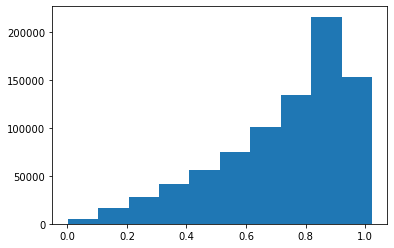

In [58]:
plt.hist(df_df['radius'])

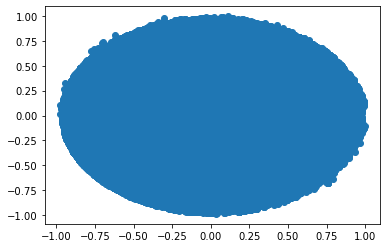

In [50]:
plt.scatter(all_data_sine_gratings['end_x_position'],all_data_sine_gratings['end_y_position'])